In [1]:
#pacchetto per scaricare dati direttamente da codice
import osmnx as ox
import matplotlib.pyplot as plt

#pacchetto contenente algoritmo di Dijkstra
import networkx as nx
%matplotlib inline

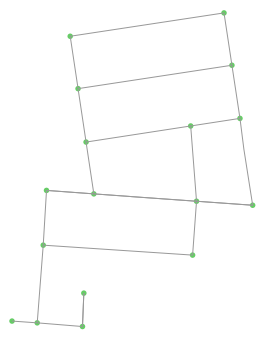

In [2]:
location_point = (40.6802614, -73.9397006)

#ci sono più modi per scaricare una mappa, qui ho usato un punto (con coordinare geografiche) e un raggio ( chiamato distance) 
G = ox.graph_from_point(location_point, distance=250, distance_type='bbox', network_type='drive')

#plotta la mappa
fig, ax = ox.plot_graph(G, node_size=30, node_color='#66cc66')

In [4]:
#estraggo i due dataframe
nodes, edges = ox.graph_to_gdfs(G)

In [6]:
#i nodi non sono numerati sequenzialmente, non partono da zero
nodes

,y,x,osmid,highway,geometry
42464995,40.679889,-73.940334,42464995,traffic_signals,POINT (-73.9403341 40.6798893)
42464999,40.679786,-73.938436,42464999,traffic_signals,POINT (-73.938436 40.679786)
42465002,40.679730,-73.937398,42465002,traffic_signals,POINT (-73.937398 40.67973)
42467425,40.679170,-73.941270,42467425,NaN,POINT (-73.9412696 40.6791703)
42467431,40.678081,-73.941381,42467431,traffic_signals,POINT (-73.9413807 40.6780813)
42475388,40.680841,-73.938544,42475388,NaN,POINT (-73.93854380000001 40.6808412)
42475392,40.679031,-73.938508,42475392,traffic_signals,POINT (-73.9385084 40.6790309)
42497847,40.678030,-73.940544,42497847,NaN,POINT (-73.9405438 40.6780297)
42498485,40.680948,-73.937633,42498485,traffic_signals,POINT (-73.93763269999999 40.6809475)
42499211,40.682099,-73.940771,42499211,traffic_signals,POINT (-73.9407709 40.6820988)


In [7]:
#pare che la struttura dati da loro utilizzata sia la forward star:
#la colonna "u" = nodo coda dell'arco
#La colonna "v" = nodo testa dell'arco
edges

,u,v,key,osmid,oneway,name,highway,length,geometry,maxspeed,lanes
0,42464995,4224536022,0,221753933,False,Fulton Street,secondary,73.975,"LINESTRING (-73.94033 40.67989, -73.94121 40.6...",NaN,NaN
1,42464995,42499215,0,5678442,True,Throop Avenue,residential,81.664,"LINESTRING (-73.94033 40.67989, -73.94039 40.6...",25 mph,NaN
2,42464995,42464999,0,221753948,False,Fulton Street,secondary,160.474,"LINESTRING (-73.94033 40.67989, -73.93989 40.6...",25 mph,NaN
3,42464999,42475388,0,5676437,True,Albany Avenue,residential,117.685,"LINESTRING (-73.93844 40.67979, -73.93854 40.6...",NaN,NaN
4,42464999,42475392,0,37183340,True,Albany Avenue,residential,84.185,"LINESTRING (-73.93844 40.67979, -73.93851 40.6...",NaN,NaN
5,42464999,42465002,0,221585913,False,Fulton Street,secondary,87.752,"LINESTRING (-73.93844 40.67979, -73.93788 40.6...",NaN,NaN
6,42464999,42464995,0,221753948,False,Fulton Street,secondary,160.474,"LINESTRING (-73.93844 40.67979, -73.93964 40.6...",25 mph,NaN
7,42465002,42464999,0,221585913,False,Fulton Street,secondary,87.752,"LINESTRING (-73.93740 40.67973, -73.93759 40.6...",NaN,NaN
8,42467425,42475392,0,5679854,True,Herkimer Street,residential,233.360,"LINESTRING (-73.94127 40.67917, -73.93851 40.6...",NaN,NaN
9,42467425,4224536022,0,680852336,True,Kingston Avenue,residential,85.517,"LINESTRING (-73.94127 40.67917, -73.94121 40.6...",NaN,NaN


In [9]:
#trovo il cammino minimo tra due nodi scelti a caso, restituisce una lista di nodi
route = nx.shortest_path(G=G, source=42464995, target=42516282, weight='length')
print(route)

[42464995, 42499215, 42499213, 42499211, 42516282]


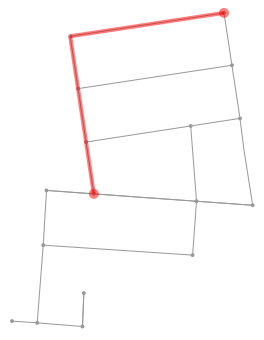

In [10]:
#plotta mappa e soluzione
fig, ax = ox.plot_graph_route(G, route)